In [1]:
# python
import sys
import importlib
import os
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout, selection, llpnanoaodschema
#from sidm.tools import llpnanoaodschema_0726 as llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
importlib.reload(selection)
importlib.reload(llpnanoaodschema)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
from hist import Hist

In [2]:
samples = [
    '2Mu2E_800GeV_5p0GeV_50p0mm',
    '2Mu2E_800GeV_1p2GeV_12p0mm',
    '2Mu2E_800GeV_0p25GeV_2p5mm',
    '2Mu2E_500GeV_5p0GeV_80p0mm',
    '2Mu2E_500GeV_1p2GeV_19p0mm',
    '2Mu2E_500GeV_0p25GeV_4p0mm',
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(client=client),
    #schema=NanoAODSchema,
    #schema=llpnanoaodschema.NanoAODSchema,
    schema=llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)

channels = [
    "base",
    "base_preCC",
    "base_CC",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["genA_toMu_base"],
    verbose=True,
)

out = {}
for i, sample in enumerate(samples):

    print(f"Processing {sample}")
    fileset_one_sample = {samples[i]:fileset.get(samples[i])}
    
    output = runner.run(fileset_one_sample, treename='Events', processor_instance=p)

    #Add this sample's output to the out variable
    out[sample] = output["out"][sample]

Output()

Processing 2Mu2E_800GeV_5p0GeV_50p0mm


Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

/usr/local/lib/python3.12/site-packages/awkward/_nplikes/array_module.py:292: RuntimeWarning: invalid value 
encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

#--------------------------------------------------------------------------
#                         FastJet release 3.4.3
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1360) with [[[0, 0, 0, None, None]], [[0, 0, ..., None]], ..., [[1, 1, None, None, None]]]: jagged slice 
inner length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Output()

Signal not in xs cfg, assuming 1fb
Processing 2Mu2E_800GeV_1p2GeV_12p0mm


Output()

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(

/usr/local/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing 
cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1369) with [[[1, 1, None, None, None]], [[1, 1, ..., None, None]], ..., [[1, 0, 0, 0, 0]]]: jagged slice 
inner length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Output()

Signal not in xs cfg, assuming 1fb
Processing 2Mu2E_800GeV_0p25GeV_2p5mm


Output()

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1109) with [[[0, 0, 0, 0, None]], [[0, 0, ..., None]], ..., [[0, 0, None, None, None]]]: jagged slice inner 
length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Output()

Signal not in xs cfg, assuming 1fb
Processing 2Mu2E_500GeV_5p0GeV_80p0mm


Output()

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1136) with [[[0, 1, None, None, None]], [[1, ...]], ..., [[0, None, None, None, None]]]: jagged slice inner 
length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Output()

Signal not in xs cfg, assuming 1fb
Processing 2Mu2E_500GeV_1p2GeV_19p0mm


Output()

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1225) with [[[0, 0, 0, 0, None]], [[0, 0, 0, 0, 0]], ..., [[...]], [[1, 0, 0, None, None]]]: jagged slice 
inner length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Output()

Signal not in xs cfg, assuming 1fb
Processing 2Mu2E_500GeV_0p25GeV_4p0mm


Output()

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons dR(dsa, pf) > 0.2

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Warning: Unable to apply dR(dsa, pf) > 0.2 for nested dsaMuons collection. Skipping.... cannot slice ListArray (of 
length 1023) with [[[0, 0, 0, None, None]], [[0, 0, 1, 1, None]], ..., [[...]], [[0, 0, 0, 0, 0]]]: jagged slice 
inner length differs from array inner length (in compiled code: 
https://github.com/scikit-hep/awkward/blob/awkward-cpp-45/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_jag
ged_descend.cpp#L27)

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Applying genMus status 1

Applying genEs status 1

Applying electrons pT > 10 GeV

Applying electrons |eta| < 2.4

Applying electrons MVANonIsoWPL

Applying muons looseID

Applying muons pT > 5 GeV

Applying muons |eta| < 2.4

Applying photons pT > 20 GeV

Applying photons |eta| < 2.5

Applying photons Custom Cutbased

Applying photons pixelSeed

Applying photons Photon DR Veto 0p025

Applying dsaMuons pT > 10 GeV

Applying dsaMuons |eta| < 2.4

Applying dsaMuons displaced ID

Applying cuts to the nested muons collection

Applying cuts to the nested dsaMuons collection

Applying dsaMuons all

Applying ljs pT > 30 GeV

Applying ljs |eta| < 2.4

Applying ljs mu_charge == 0

Applying cut: pass triggers

Applying cut: PV filter

Applying cut: >=2 LJs

Signal not in xs cfg, assuming 1fb


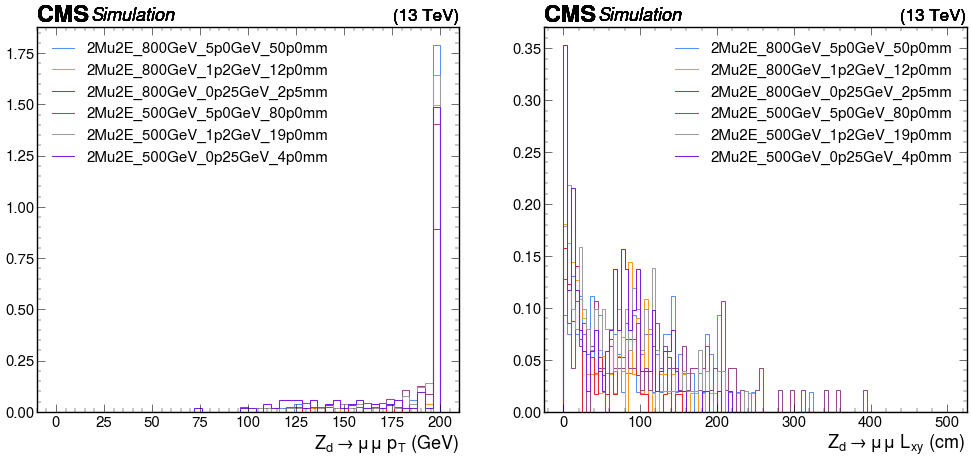

In [4]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toMu_pt"][channels[0], :], density=False, yerr=False)
plt.legend(samples)

plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["genAs_toMu_lxy"][channels[1], :], density=False, yerr=False)
plt.legend(samples)